### Linear Regression Task

##### 다이아몬드 가격 예측

- price: 미국 달러로 표시된 가격 (＄326 ~ ＄18,823)
- carat: 다이아몬드의 무게(0.2 ~ 5.01)
- cut: 품질(공정, 좋음, 매우 좋음, 프리미엄, 이상적)
- color: 다이아몬드 색상, J(최악)부터 D(최우수)까지
- clarity: 다이아몬드가 얼마나 선명한지에 대한 측정값 (I1(최악), SI2, SI1, VS2, VS1, VVS2, VVS1, IF(최우수))
- x: 길이(mm) (0 ~ 10.74)
- y: 너비(mm)(0 ~ 58.9)
- z: 깊이(mm)(0 ~ 31.8)
- depth: 총 깊이 백분율 = z / 평균(x, y) = 2 * z / (x + y) (43–79)
- table: 가장 넓은 점에 대한 다이아몬드 상단 폭(43 ~ 95)

In [1]:
import pandas as pd
diamond_df = pd.read_csv('./datasets/diamond.csv')
diamond_df = diamond_df.drop(columns=diamond_df.columns[0], axis=1)
diamond_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [2]:
diamond_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  object 
 2   color    53943 non-null  object 
 3   clarity  53943 non-null  object 
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   price    53943 non-null  int64  
 7   x        53943 non-null  float64
 8   y        53943 non-null  float64
 9   z        53943 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [3]:
diamond_df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [4]:
diamond_df.duplicated().sum()

149

In [5]:
diamond_df = diamond_df.drop_duplicates()
diamond_df = diamond_df.reset_index(drop=True)
diamond_df.duplicated().sum()

0

<Axes: >

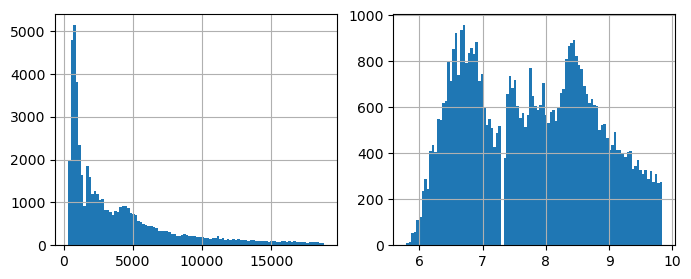

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

fig, ax = plt.subplots(1, 2, figsize=(8, 3))
diamond_df.price.hist(bins=100, ax=ax[0])
np.log1p(diamond_df.price).hist(bins=100, ax=ax[1])

In [7]:
from sklearn.preprocessing import LabelEncoder

encoders = []
columns = ['cut', 'color', 'clarity']

for column in columns:
    encoder = LabelEncoder()
    encoded_feature = encoder.fit_transform(diamond_df[column])
    diamond_df[column] = encoded_feature
    encoders.append(encoder)
    print(encoder.classes_)

['Fair' 'Good' 'Ideal' 'Premium' 'Very Good']
['D' 'E' 'F' 'G' 'H' 'I' 'J']
['I1' 'IF' 'SI1' 'SI2' 'VS1' 'VS2' 'VVS1' 'VVS2']


Text(0.5, 1.0, 'Correlation')

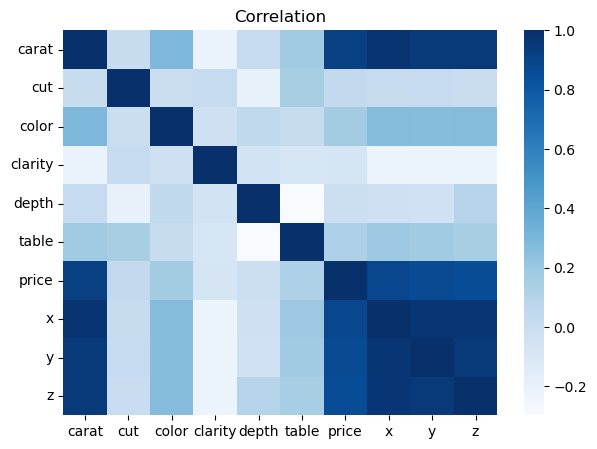

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = diamond_df.corr()
fig = plt.figure(figsize=(7, 5))
heatmap = sns.heatmap(correlation_matrix, cmap="Blues")
heatmap.set_title("Correlation")

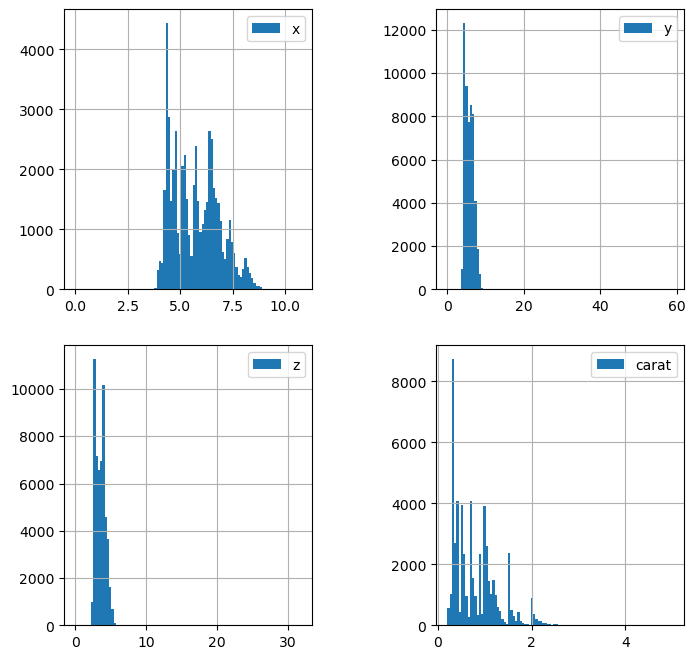

In [9]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(8, 8))
diamond_df.x.hist(bins=100, ax=ax[0, 0], legend='X')
diamond_df.y.hist(bins=100, ax=ax[0, 1], legend='Y')
diamond_df.z.hist(bins=100, ax=ax[1, 0], legend='Z')
diamond_df.carat.hist(bins=100, ax=ax[1, 1], legend='Carat')
plt.subplots_adjust(wspace=0.5)
plt.show()

In [10]:
diamond_df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53794.0,0.797780,0.473390,0.2,0.40,0.70,1.04,5.01
cut,53794.0,2.553947,1.027569,0.0,2.00,2.00,3.00,4.00
color,53794.0,2.593914,1.701117,0.0,1.00,3.00,4.00,6.00
clarity,53794.0,3.835762,1.724872,0.0,2.00,4.00,5.00,7.00
depth,53794.0,61.748080,1.429909,43.0,61.00,61.80,62.50,79.00
table,53794.0,57.458109,2.233679,43.0,56.00,57.00,59.00,95.00
price,53794.0,3933.065082,3988.114460,326.0,951.00,2401.00,5326.75,18823.00
x,53794.0,5.731214,1.120695,0.0,4.71,5.70,6.54,10.74
y,53794.0,5.734653,1.141209,0.0,4.72,5.71,6.54,58.90
z,53794.0,3.538714,0.705037,0.0,2.91,3.53,4.03,31.80
